In [1]:
import psycopg2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
from tqdm import tqdm # type: ignore
import numpy as np # type: ignore
config = {
    "host": "10.188.200.16",
    "dbname": "tw",
    "user": "jimmy",
    "password": "123123"
}
conn = psycopg2.connect(**config)
cursor = conn.cursor()

In [2]:
import psycopg2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
from tqdm import tqdm # type: ignore
import numpy as np # type: ignore
config = {
    "host": "10.188.200.16",
    "dbname": "tw",
    "user": "jimmy",
    "password": "123123"
}
conn = psycopg2.connect(**config)
cursor = conn.cursor()

# price
sqlStr = """
SELECT DISTINCT p.da, p.nav, p.code, m.fund_type_code
FROM maincode_fund AS m
LEFT JOIN price_fund AS p ON p.code = m.code
WHERE p.da >= '2016-01-01' and m.year = '2025'
ORDER BY p.code, p.da DESC;
"""
cursor.execute(sqlStr)
res = cursor.fetchall()
df = pd.DataFrame(res)
df.columns = ["da", "nav", "code", "fund_type"]
fund_type_list = list(set(df.fund_type))

# fund type to be of stocks
sqlStr = """
SELECT distinct fund_type_code
FROM maincode_fund
WHERE year = '2025' 
AND fund_type LIKE '%股票%'
ORDER BY fund_type_code;
"""
cursor.execute(sqlStr)
conn.commit()
res = cursor.fetchall()
list_stock_fundtype = [i[0] for i in res]

In [18]:
df.to_csv("data.csv")

In [19]:
df

,da,nav,code,fund_type
0,2025-01-15,28.5100,00965469,AA1
1,2025-01-14,28.7800,00965469,AA1
2,2025-01-13,28.4300,00965469,AA1
3,2025-01-10,29.4100,00965469,AA1
4,2025-01-09,29.5700,00965469,AA1
...,...,...,...,...
5024084,2025-01-10,9.8300,98642090,AA2
5024085,2025-01-09,9.9600,98642090,AA2
5024086,2025-01-08,10.0100,98642090,AA2
5024087,2025-01-14,9.9999,98642093,None


In [3]:
list_stock_fundtype, fund_type_list

(['AA1',
  'AA2',
  'AB2',
  'AE21',
  'AH11',
  'AH13',
  'AH21',
  'AH22',
  'AH23',
  'AH24',
  'AH25'],
 ['AG',
  'AH25',
  'AE1',
  'AA1',
  'AC12',
  'AA2',
  'AE23',
  'AH24',
  'AE24',
  'AH23',
  'AH22',
  None,
  'AK1',
  'AC21',
  'AH13',
  'AB1',
  'AD2',
  'AE22',
  'AB2',
  'AF',
  'AE21',
  'AI1',
  'AH21',
  'AH11',
  'AJ2',
  'AI2',
  'AD1',
  'AC23',
  'AJ1'])

In [4]:
# fund type in Mandarin
sqlStr = """
SELECT distinct fund_type, fund_type_code
FROM maincode_fund
WHERE year = '2025';
"""
cursor.execute(sqlStr)
conn.commit()
res = cursor.fetchall()
list_fund_type_mandarin = {i[0]: i[1] for i in res}

In [5]:
benchmark_list = [
    {{'組合型–跨國投資(債券型)': 'AE22'}: {'彭博巴克萊全球綜合債券指數': 'AE22'}},
    {{'跨國投資多重資產型': 'AJ2'}: {'60% MSCI世界指數 + 40% 彭博巴克萊全球綜合債券指數': 'AJ2'}},
    {{'國內ETF連結基金': 'AK1'}: {'台灣50指數 (TW50)': 'AK1'}},
    {{'國內投資指數股票型_槓桿型/反向型': 'AH13'}: {'台灣加權指數 (TAIEX)': 'AH13'}},
    {{'保本型': 'AF'}: {'台灣三個月國庫券指數': 'AF'}},
    {{'固定收益型–跨國投資(一般債券)': 'AC21'}: {'彭博巴克萊全球綜合債券指數': 'AC21'}},
    {{'跨國投資組合型_股票型': 'AE21'}: {'MSCI世界指數': 'AE21'}},
    {{'國內投資平衡型': 'AB1'}: {'60% 台灣加權指數 + 40% 台灣債券指數': 'AB1'}},
    {{'跨國投資指數股票型_不動產證券化/其他': 'AH25'}: {'FTSE EPRA/NAREIT全球不動產指數': 'AH25'}},
    {{'跨國投資指數股票型_槓桿型/反向型_股票': 'AH23'}: {'MSCI世界指數': 'AH23'}},
    {{'跨國投資平衡型': 'AB2'}: {'60% MSCI世界指數 + 40% 彭博巴克萊全球綜合債券指數': 'AB2'}},
    {{'國內投資組合型': 'AE1'}: {'台灣加權指數 (TAIEX)': 'AE1'}},
    {{'跨國投資股票型': 'AA2'}: {'MSCI世界指數': 'AA2'}},
    {{'國內投資指數股票型_股票型': 'AH11'}: {'台灣加權指數 (TAIEX)': 'AH11'}},
    {{'跨國投資組合型_其他': 'AE24'}: {'MSCI全球指數 (MSCI ACWI)': 'AE24'}},
    {{'非投資等級債券型': 'AC23'}: {'彭博全球高收益債券指數': 'AC23'}},
    {{'組合型–跨國投資(平衡型)': 'AE23'}: {'60% MSCI世界指數 + 40% 彭博巴克萊全球綜合債券指數': 'AE23'}},
    {{'國內投資固定收益一般債券型': 'AC12'}: {'台灣債券指數': 'AC12'}},
    {{'跨國投資組合型_平衡型': 'AE23'}: {'60% MSCI世界指數 + 40% 彭博巴克萊全球綜合債券指數': 'AE23'}},
    {{'跨國投資組合型_債券型': 'AE22'}: {'彭博巴克萊全球綜合債券指數': 'AE22'}},
    {{'固定收益型–跨國投資(高收益債券)': 'AC23'}: {'彭博全球高收益債券指數': 'AC23'}},
    {{'股票型–國內投資': 'AA1'}: {'台灣加權指數 (TAIEX)': 'AA1'}},
    {{'跨國投資固定收益一般債券型': 'AC21'}: {'彭博巴克萊全球綜合債券指數': 'AC21'}},
    {{'跨國投資指數股票型_槓桿型/反向型_債券': 'AH24'}: {'MSCI世界指數': 'AH24'}},
    {{'國內投資貨幣市場基金': 'AD1'}: {'台灣三個月國庫券指數': 'AD1'}},
    {{'不動產證券化型': 'AG'}: {'FTSE EPRA/NAREIT全球不動產指數': 'AG'}},
    {{'國內投資多重資產型': 'AJ1'}: {'60% 台灣加權指數 + 40% 台灣債券指數': 'AJ1'}},
    {{'跨國投資指數型': 'AI2'}: {'MSCI世界指數': 'AI2'}},
    {{'跨國投資指數股票型_債券型': 'AH22'}: {'MSCI世界指數': 'AH22'}},
    {{'國內投資股票型': 'AA1'}: {'台灣加權指數 (TAIEX)': 'AA1'}},
    {{'跨國投資指數股票型_股票型': 'AH21'}: {'MSCI世界指數': 'AH21'}},
    {{'債券股票平衡型–跨國投資': 'AB2'}: {'60% MSCI世界指數 + 40% 彭博巴克萊全球綜合債券指數': 'AB2'}},
    {{'股票型–跨國投資': 'AA2'}: {'MSCI世界指數': 'AA2'}},
    {{'跨國投資貨幣市場基金': 'AD2'}: {'彭博全球貨幣市場指數': 'AD2'}},
    {{'國內投資指數型': 'AI1'}: {'台灣加權指數 (TAIEX)': 'AI1'}},
    {{'不動產證券化': 'AG'}: {'FTSE EPRA/NAREIT全球不動產指數': 'AG'}}
]


TypeError: unhashable type: 'dict'

In [6]:
# getting benchmark for calculating alpha
sqlStr = """
select da, cl from price where code = '0050 TT Equity' and da >= '2016-01-01'
order by da asc;
"""
cursor.execute(sqlStr)
conn.commit()
res = cursor.fetchall()
beck = pd.DataFrame(res, columns=['da', 'cl'])
beck.set_index('da', inplace=True)

In [7]:
all_df = df.pivot(values='nav', index='da', columns='code')
all_df = all_df.ffill()
pct_change_all = all_df.pct_change()
pct_change_all[(pct_change_all > 0.1) | (pct_change_all < -0.1)] = 0

In [8]:
alpha_check_typewise = pd.DataFrame()
alpha = pd.DataFrame()
all_cumsum = pct_change_all.mean(axis=1).cumsum()
alpha_check_typewise['all'] = all_cumsum
alpha['all'] = all_cumsum
for fundTypeCode in fund_type_list:
    _ = df[df['fund_type'] == fundTypeCode].pivot(values='nav', index='da', columns='code').ffill()
    print(fundTypeCode, len(_.columns))

AG 83
AH25 2
AE1 1
AA1 196
AC12 1
AA2 787
AE23 249
AH24 4
AE24 15
AH23 21
AH22 97
None 0
AK1 10
AC21 912
AH13 8
AB1 25
AD2 13
AE22 105
AB2 138
AF 4
AE21 27
AI1 4
AH21 71
AH11 58
AJ2 768
AI2 46
AD1 36
AC23 571
AJ1 8


In [9]:
alpha_check_typewise = pd.DataFrame()
alpha = pd.DataFrame()
all_cumsum = pct_change_all.mean(axis=1).cumsum()
alpha_check_typewise['all'] = all_cumsum
alpha['all'] = all_cumsum
for fundTypeCode in tqdm(fund_type_list):
    _ = df[df['fund_type'] == fundTypeCode].pivot(values='nav', index='da', columns='code').ffill()
    d = _.pct_change()
    d[(d > 0.1) | (d < -0.1)] = 0
    _cumsum = d.mean(axis=1).cumsum()
    alpha_check_typewise[fundTypeCode] = _cumsum
    alpha[fundTypeCode] = _cumsum - all_cumsum

100%|██████████| 29/29 [00:05<00:00,  5.07it/s]


<Axes: xlabel='da'>

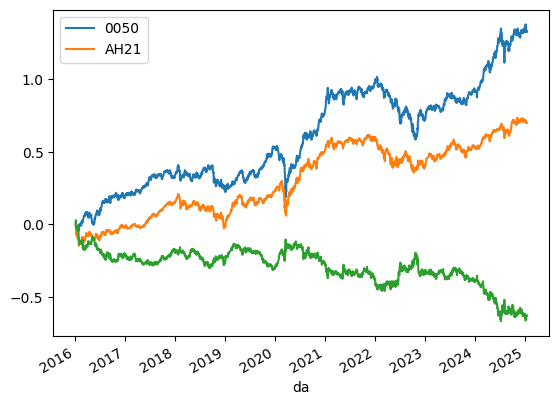

In [10]:
alpha_check_typewise['0050'] = beck.pct_change().cumsum()
alpha_check_typewise['AA1_alpha'] = alpha_check_typewise['AH21'] - alpha_check_typewise["0050"]
alpha_check_typewise[["0050", "AH21"]].plot()
alpha_check_typewise["AA1_alpha"].plot( )

<Axes: xlabel='da'>

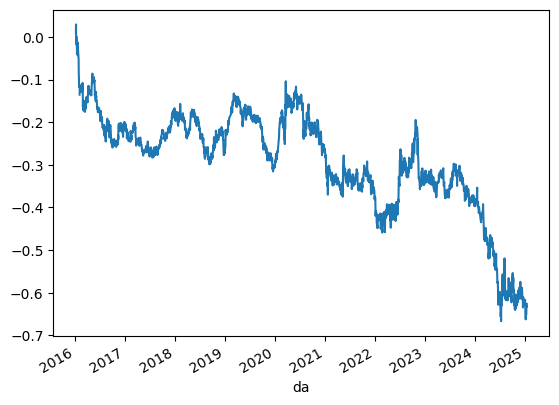

In [11]:
alpha_check_typewise["AA1_alpha"].plot()

In [12]:
tdf = df[df['fund_type'] == "AH21"].pivot(values='nav', index='da', columns='code')
tdf = tdf.ffill()
pct_change = tdf.pct_change()
pct_change[(pct_change > 0.1) | (pct_change < -0.1)] = 0
pct_change = pct_change.iloc[:, :30]
init = 20
dates = pct_change.index[init:] 
turbulences = [0.0] * len(pct_change)
for i in range(len(dates)):
    pct_1 = pct_change.iloc[i:init+i, :]
    mean = np.array(pct_1.mean())
    cov = np.array(pct_1.cov())
    pct_current = np.array(pct_1.iloc[-1])
    
    turbulence = (pct_current - mean) @ cov @ (pct_current - mean).T
    turbulences[init+i] = turbulence
    print(i, turbulence)
    
turbulence_df = pd.DataFrame(turbulences, columns=["turbulence"])
turbulence_df.index = pct_change.index
mm = pct_change.mean(axis=1)
for i in range(len(pct_change.columns)):
    pct_change.iloc[:, i] = pct_change.iloc[:, i] - mm
cumsum = pct_change.cumsum()
cumsum_shift1 = cumsum.shift(-1)

0 nan
1 nan
2 nan
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 nan
12 nan
13 nan
14 nan
15 nan
16 nan
17 nan
18 nan
19 nan
20 nan
21 nan
22 nan
23 nan
24 nan
25 nan
26 nan
27 nan
28 nan
29 nan
30 nan
31 nan
32 nan
33 nan
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 nan
44 nan
45 nan
46 nan
47 nan
48 nan
49 nan
50 nan
51 nan
52 nan
53 nan
54 nan
55 nan
56 nan
57 nan
58 nan
59 nan
60 nan
61 nan
62 nan
63 nan
64 nan
65 nan
66 nan
67 nan
68 nan
69 nan
70 nan
71 nan
72 nan
73 nan
74 nan
75 nan
76 nan
77 nan
78 nan
79 nan
80 nan
81 nan
82 nan
83 nan
84 nan
85 nan
86 nan
87 nan
88 nan
89 nan
90 nan
91 nan
92 nan
93 nan
94 nan
95 nan
96 nan
97 nan
98 nan
99 nan
100 nan
101 nan
102 nan
103 nan
104 nan
105 nan
106 nan
107 nan
108 nan
109 nan
110 nan
111 nan
112 nan
113 nan
114 nan
115 nan
116 nan
117 nan
118 nan
119 nan
120 nan
121 nan
122 nan
123 nan
124 nan
125 nan
126 nan
127 nan
128 nan
129 nan
130 nan
131 nan
132 nan
133 nan
134 nan
135 nan
136 nan
137 nan
138 na

In [13]:
# pct_change.shift(-1): 用來和權重相乘
# turbulence_df: index對標cumsum_shift1 所以權重放在index日期
# 如果 turbulence_df.index = 2020-03-13 
#   -> 2020-03-13.yesterday(0312) 是訊號日期 
#   -> 用 cumsum(沒有調整過的)來決定持倉

In [14]:
position = []
holding_history = {}

for date, row in turbulence_df.iterrows():
    t = row.iloc[0] * 10000  # Assuming turbulence score
    if t > 3:
        k = pct_change.loc[:date].iloc[:, :]
        top_five = k.cumsum().iloc[-1].nlargest(2).index
        position = list(top_five)  # Convert to a list

        holding_history[date] = position

pct_change_shift1 = pct_change.shift(-1)

holding_history


{Timestamp('2020-03-10 00:00:00'): ['98638112', '98637675'],
 Timestamp('2020-03-13 00:00:00'): ['98637675', '98638799'],
 Timestamp('2020-03-16 00:00:00'): ['98638112', '98637675'],
 Timestamp('2020-03-17 00:00:00'): ['98638112', '98637943'],
 Timestamp('2020-03-18 00:00:00'): ['98638112', '98637675'],
 Timestamp('2020-03-19 00:00:00'): ['98638112', '98637943'],
 Timestamp('2020-03-25 00:00:00'): ['98638112', '98637943'],
 Timestamp('2020-03-26 00:00:00'): ['98638112', '98637943'],
 Timestamp('2020-03-27 00:00:00'): ['98638112', '98637943'],
 Timestamp('2020-04-06 00:00:00'): ['98638112', '98637943'],
 Timestamp('2020-04-07 00:00:00'): ['98638112', '98637943'],
 Timestamp('2020-04-22 00:00:00'): ['98638112', '98639085'],
 Timestamp('2024-10-01 00:00:00'): ['98639085', '98638112'],
 Timestamp('2024-10-11 00:00:00'): ['98639085', '98638112']}

In [15]:
holding_df = pd.DataFrame(list(holding_history.items()), columns=['Date', 'Code']).set_index('Date')
hhdf = pd.DataFrame(index=pct_change_shift1.index)
hhdf['code'] = holding_df
hhdf.index.name = "Date"
hhdf = hhdf.ffill()

hhdf1 = hhdf.join(pct_change_shift1, on='Date')
hhdf1 = hhdf1.fillna(0)
hhdf1['pct_change'] = hhdf1.apply(lambda x: 0 if x.iloc[0] == 0 else x[x.iloc[0]].mean(), axis=1)

<Axes: xlabel='Date'>

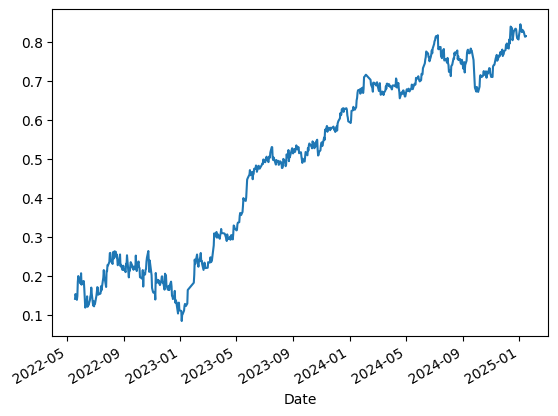

In [16]:
m = 0
n = -1
hhdf1['pct_change'].cumsum().iloc[-650:].plot()

<Axes: xlabel='Date'>

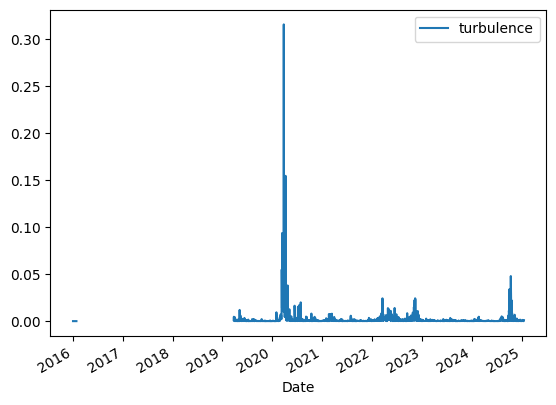

In [17]:
(turbulence_df*100).plot()
